In [115]:
## Loading packages
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sklearn

from sklearn import linear_model
from sklearn import preprocessing
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm

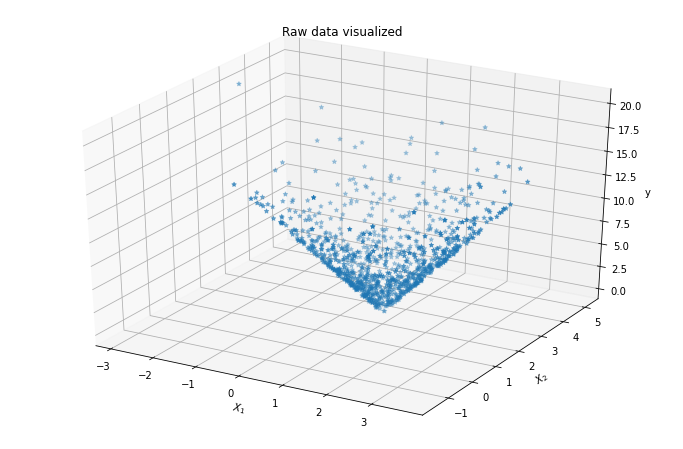

Text(0.5, 1.0, 'Transformed feature against target variable')

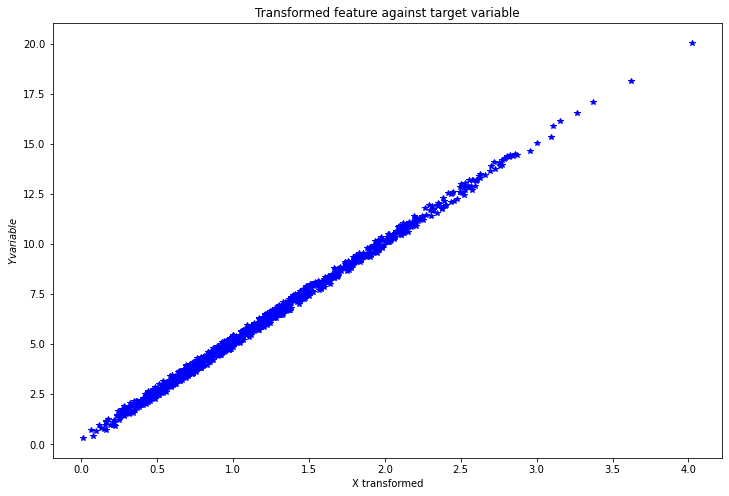

In [116]:
import h5py
hf = h5py.File('toy-regression.h5', 'r')
x_train = np.array(hf.get('x_train'))
y_train = np.array(hf.get('y_train'))
x_test = np.array(hf.get('x_test'))
y_test = np.array(hf.get('y_test'))
hf.close()


#print(y_train)

#print(x_train.shape)

## Initial data 
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_train[:,0], x_train[:,1], y_train, marker='*')
ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')
ax.set_zlabel('y',)
plt.title('Raw data visualized')
plt.show()



#print(np.mean(x_train[:,0]))
#print(np.mean(x_train[:,1]))


## Transform data
x_train_transformed = np.c_[ x_train, np.sqrt( np.power( (x_train[:,0] - np.mean(x_train[:,0])) ,2) 
                                              + np.power( (x_train[:,1] - np.mean(x_train[:,1])) ,2) ) ] 

x_test_transformed = np.c_[ x_test, np.sqrt( np.power( (x_test[:,0] - np.mean(x_test[:,0])) ,2) 
                                              + np.power( (x_test[:,1] - np.mean(x_test[:,1])) ,2) ) ]


#print(x_train_transformed)


## Plotting transformed features and  
plt.figure(figsize=(12,8))
plt.plot(x_train_transformed[:,2], y_train, '*', c = 'b')
plt.xlabel('X transformed')
plt.ylabel('$Y variable$')
plt.title('Transformed feature against target variable')


In [117]:
lrSKL = linear_model.LinearRegression(fit_intercept = False)
lrSKL.fit(x_train_transformed[:,2].reshape(-1, 1), y_train)

y_hat_trainSKL = lrSKL.predict(x_train_transformed[:,2].reshape(-1, 1))
y_hat_testSKL = lrSKL.predict(x_test_transformed[:,2].reshape(-1, 1))

testMSE_SKL = metrics.mean_squared_error(y_test, y_hat_testSKL, squared=True)
trainMSE_SKL = metrics.mean_squared_error(y_train, y_hat_trainSKL, squared=True)

#print(np.mean( (y_test - y_hat_testSKL)**2 ) )
#print(np.mean( (y_train - y_hat_trainSKL)**2 ) )

print('MSE of test dataset of model based on trasnformed feature', testMSE_SKL)
print('MSE of train dataset of model based on trasnformed feature', trainMSE_SKL)


MSE of test dataset of model based on trasnformed feature 0.02373669127490925
MSE of train dataset of model based on trasnformed feature 0.031918357125925265


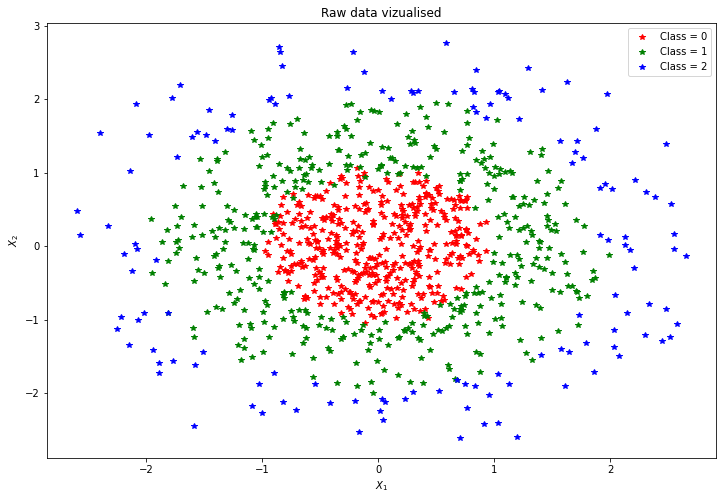

In [118]:
hf = h5py.File('toy-classification.h5', 'r')
x_train = np.array(hf.get('x_train'))
y_train = np.array(hf.get('y_train'))
x_test = np.array(hf.get('x_test'))
y_test = np.array(hf.get('y_test'))
hf.close()


idx_0 = np.where(y_train == 0)[0]
idx_1 = np.where(y_train == 1)[0]
idx_2 = np.where(y_train == 2)[0]


plt.figure(figsize=(12,8))
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.plot(x_train[idx_0,0], x_train[idx_0,1], '*', c = 'r', label = "Class = 0")
plt.plot(x_train[idx_1,0], x_train[idx_1,1], '*', c = 'g', label = "Class = 1")
plt.plot(x_train[idx_2,0], x_train[idx_2,1], '*', c = 'b', label = "Class = 2")
plt.title('Raw data vizualised')
plt.legend()




In [119]:
#scaling_factor = np.mean(np.power(np.abs(x_test[:,1]),2)) / np.mean(np.power(np.abs(x_test[:,0]),2))
#scaling_factor =np.sqrt((1 - (np.mean(x_train[:,1]) / np.mean(x_train[:,0]))))

scaling_factor = 1



x_train_transformed = np.c_[ x_train, np.sqrt( np.power( x_train[:,0]  ,2) + np.power( x_train[:,1]  ,2)) * np.pi * 2 ]

x_test_transformed = np.c_[ x_test, np.sqrt( np.power( x_test[:,0]  ,2) + np.power( x_test[:,1]  ,2)) * np.pi * 2 ]





#scaling_factor = np.mean(np.power(np.abs(x_test[:,1]),2)) / np.mean(np.power(np.abs(x_test[:,0]),2))



#x_train_transformed = np.c_[ x_train, np.sqrt( np.power( x_train[:,0]  ,2) + np.power( x_train[:,1]  ,2)) * np.pi * 2 ]

#x_test_transformed = np.c_[ x_test, np.sqrt( np.power( x_test[:,0]  ,2) + np.power( x_test[:,1]  ,2)) * np.pi * 2 ]







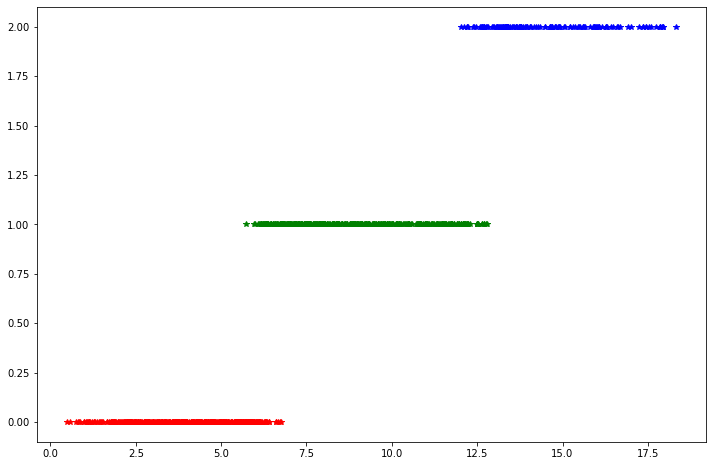

In [120]:
plt.figure(figsize=(12,8))
plt.plot(x_train_transformed[idx_0,2], y_train[idx_0], '*', c = 'r', label = "Class = 0")
plt.plot(x_train_transformed[idx_1,2], y_train[idx_1], '*', c = 'g', label = "Class = 1")
plt.plot(x_train_transformed[idx_2,2], y_train[idx_2], '*', c = 'b', label = "Class = 2")





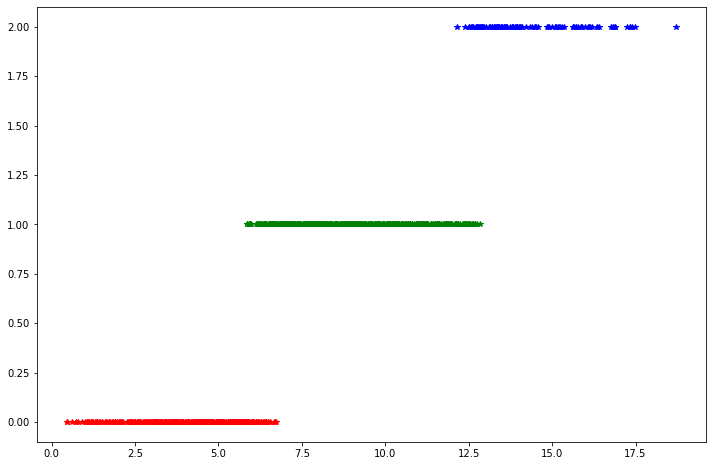

In [121]:
idx_0t = np.where(y_test == 0)[0]
idx_1t = np.where(y_test == 1)[0]
idx_2t = np.where(y_test == 2)[0]

plt.figure(figsize=(12,8))
plt.plot(x_test_transformed[idx_0t,2], y_test[idx_0t], '*', c = 'r', label = "Class = 0")
plt.plot(x_test_transformed[idx_1t,2], y_test[idx_1t], '*', c = 'g', label = "Class = 1")
plt.plot(x_test_transformed[idx_2t,2], y_test[idx_2t], '*', c = 'b', label = "Class = 2")

In [122]:
clf = svm.LinearSVC() 
clf.fit(x_train, y_train)

yhat_train = clf.predict(x_train)
yhat_test = clf.predict(x_test)


sklearn.metrics.confusion_matrix(y_train, yhat_train)
sklearn.metrics.confusion_matrix(y_test, yhat_test)


print('Performance on train dataset; initial featres: ', sklearn.metrics.accuracy_score(y_train, yhat_train))
print('Performance on test dataset; initial features: ', sklearn.metrics.accuracy_score(y_test, yhat_test))

Performance on train dataset; initial featres:  0.49
Performance on test dataset; initial features:  0.461


In [123]:
clf = svm.LinearSVC(max_iter = 100000) 
clf.fit(x_train_transformed[:,2].reshape(-1, 1), y_train)

yhat_train = clf.predict(x_train_transformed[:,2].reshape(-1, 1))
yhat_test = clf.predict(x_test_transformed[:,2].reshape(-1, 1))


#sklearn.metrics.confusion_matrix(y_train, yhat_train)
#sklearn.metrics.confusion_matrix(y_test, yhat_test)

#print(y_test.shape)
#print(yhat_test.shape)

print('Confusion matrix for test data; transformed features: ', 
      sklearn.metrics.confusion_matrix(y_test, yhat_test))

print('Performance on train dataset; transformed featres: ', sklearn.metrics.accuracy_score(y_train, yhat_train))
print('Performance on test dataset; transforemd features: ', sklearn.metrics.accuracy_score(y_test, yhat_test))

(1000,)
(1000,)
Confusion matrix for test data; transformed features:  [[368   4   0   0]
 [ 34 466   0   0]
 [  0  68  46   0]
 [  0   0  14   0]]
Performance on train dataset; transformed featres:  0.881
Performance on test dataset; transforemd features:  0.88
